# Customer Segmentation 

#        Objective:

    The primary goal of this project is to divide customers into distinct groups based on their purchasing behavior using unsupervised learning techniques. These groups can then be used for personalized marketing, improving customer service, and product development.

---------------------------------------------------------------------------------------------

- import the dependencies 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
%matplotlib inline
import plotly.express as px
sns.set()
from sklearn.preprocessing import StandardScaler


---------------------------------------------------------------------------------------------

- load the file 


In [2]:
df = pd.read_csv('data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

---------------------------------------------------------------------------------------------

## - basic data cleaning (Exlore the data to find the missing and the duplicated )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

5268

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


 بعض القيم سالبة في الكميات و حسب وصف الداتا في الموقع هذا يعني اما العميل ارجع البضاعة بعد الشراء ( مرتجعات)  او اخطاء 

ولكن القيم السالبة في السعر غير منطقية فالسعر يجب ان يكون دائما موجب لهذا يجب فحص القيم السالبة لفهمها 

In [9]:
# كمية مرتجعات سالبة 
returns_df = df[df['Quantity'] < 0]
print(f"عدد عمليات المرتجعات: {returns_df.shape[0]}")

# أسعار سالبة 
negative_price = df[df['UnitPrice'] < 0]
print(f"عدد السطور بأسعار سالبة: {negative_price.shape[0]}")
negative_price.head()


عدد عمليات المرتجعات: 10587
عدد السطور بأسعار سالبة: 2


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


يتضح ان التسويات الداخلية للديون لا تخص اي عميل و ايضا ليست مبيعات و ليست مفيدة في اي تحليل .. لهذا سيتم حذفها 

In [10]:
df.drop(df[df['UnitPrice'] < 0].index, inplace=True)
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [11]:
# عدد السطور اللي فيها سعر 0
print(f"عدد السطور بسعر 0: {df[df['UnitPrice'] == 0].shape[0]}")

# عدد السطور بكمية 0
print(f"عدد السطور بكمية 0: {df[df['Quantity'] == 0].shape[0]}")


عدد السطور بسعر 0: 2510
عدد السطور بكمية 0: 0


كل الاسطر بقيمة صفر او سالبة غير مفيدة لانها اخطاءاو عينات او غيرها وليس مبيعات حقيقية سنحذفها ..

In [12]:

df = df[df['UnitPrice'] > 0]
df = df[df['Quantity'] > 0]

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

In [14]:
df=df.dropna()

In [15]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


no negative or zeros and the data is ready 

In [17]:
df[df['UnitPrice'] > 1000]  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
117054,546328,M,Manual,1,3/11/2011 10:19,1687.17,14911.0,EIRE
117055,546329,M,Manual,1,3/11/2011 10:22,1687.17,14911.0,EIRE
144826,548813,M,Manual,1,4/4/2011 13:03,2382.92,12744.0,Singapore
144828,548813,M,Manual,1,4/4/2011 13:03,1252.95,12744.0,Singapore
144829,548820,M,Manual,1,4/4/2011 13:04,2053.07,12744.0,Singapore
145831,548913,M,Manual,1,4/5/2011 9:45,1136.30,12669.0,France
150615,549468,M,Manual,1,4/8/2011 14:27,1867.86,17940.0,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom
200745,554155,M,Manual,1,5/23/2011 11:26,1241.98,12757.0,Portugal
201553,554301,M,Manual,1,5/23/2011 14:46,1241.98,12757.0,Portugal


In [18]:
df[df['Quantity'] > 1000]  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,United Kingdom
6365,536890,17084R,ASSORTED INCENSE PACK,1440,12/3/2010 11:48,0.16,14156.0,EIRE
16435,537659,22189,CREAM HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
533812,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,12/7/2011 12:20,2.75,15195.0,United Kingdom
534952,581175,23084,RABBIT NIGHT LIGHT,1440,12/7/2011 15:16,1.79,14646.0,Netherlands
540070,581458,22197,POPCORN HOLDER,1500,12/8/2011 18:45,0.72,17949.0,United Kingdom
540071,581459,22197,POPCORN HOLDER,1200,12/8/2011 18:46,0.72,17949.0,United Kingdom


---------------------------------------------------------------------------------------------

# convert types into right type 

In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(object)


In [20]:
#  add amount columns
df['Amount'] = df['Quantity'] * df['UnitPrice']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
 8   Amount       392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB


In [22]:
df=df[['CustomerID','InvoiceNo','Amount','InvoiceDate']]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   392692 non-null  object        
 1   InvoiceNo    392692 non-null  object        
 2   Amount       392692 non-null  float64       
 3   InvoiceDate  392692 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 15.0+ MB


---------------------------------------------------------------------------------------------

# تحليلات احصائية عامة 


In [24]:
df.head()

,CustomerID,InvoiceNo,Amount,InvoiceDate
0,17850.0,536365,15.30,2010-12-01 08:26:00
1,17850.0,536365,20.34,2010-12-01 08:26:00
2,17850.0,536365,22.00,2010-12-01 08:26:00
3,17850.0,536365,20.34,2010-12-01 08:26:00
4,17850.0,536365,20.34,2010-12-01 08:26:00


In [25]:
print(f'كمية المبيعات في كل البلدان {df['Amount'].sum()}')

كمية المبيعات في كل البلدان 8887208.894


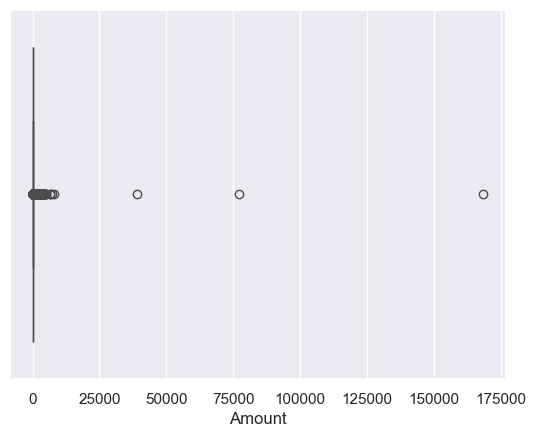

In [26]:
# توزيع الكميات
sns.boxplot(x=df['Amount'])
plt.show()



القيم الشاذة موجودة والموديل حساس للقيم الشاذة .. بالتالي اما ان نحذفها كلها او نحذف غير المنطقي منها + استخدام نموذج اقل حساسية للقيم الشاذة .. التالي هو عزلها لفحصها 

In [27]:
#  IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))

#  outlier عدد 
print(f" outlier في Amount: {outlier_condition.sum()}")


عدد الأوتلايرز في Amount: 31231


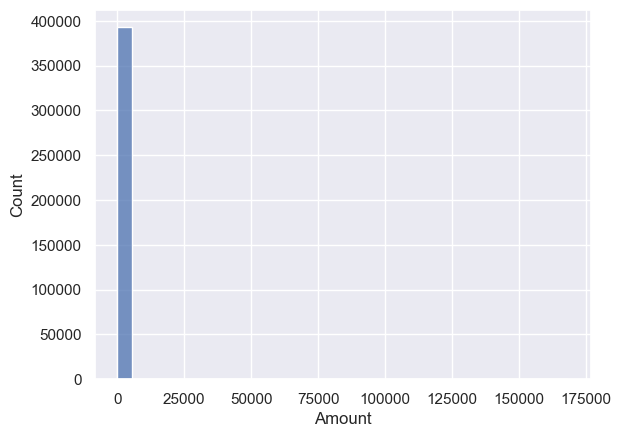

In [28]:
# توزيع Amount 
sns.histplot(df['Amount'], bins=30)
plt.show()

---------------------------------------------------------------------------------------------

# RFM analysis featuers 

What is RFM:-

it is an analysis used by markteing companies to segemente the customer according to three featuers :
 -R- Recency : the last time you bought from the brand
 -F- Frequancy :how many time you bought from them 
 -M- Monetary : how much money you spent on them 
 

 

In [29]:
df.columns

Index(['CustomerID', 'InvoiceNo', 'Amount', 'InvoiceDate'], dtype='object')

In [30]:
#  -R- Recency : the last time you bought from the brand


#  تاريخ آخر عملية شراء في الداتا كمرجع
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)  # مثلاً اليوم التالي بعد آخر عملية

# 2. نحسب آخر عملية لكل عميل
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# 3. نحسب Recency بالأيام
recency['recency'] = (reference_date - recency['InvoiceDate']).dt.days

recency.head()


,CustomerID,InvoiceDate,recency
0,12346.0,2011-01-18 10:01:00,326
1,12347.0,2011-12-07 15:52:00,2
2,12348.0,2011-09-25 13:13:00,75
3,12349.0,2011-11-21 09:51:00,19
4,12350.0,2011-02-02 16:01:00,310


In [31]:
#  -F- Frequancy :how many time you bought from them 
frequancy = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo':'frequancy'})


In [32]:
# -M- Monetary : how much money you spent on them 
monetary = df.groupby('CustomerID')['Amount'].sum().reset_index().rename(columns={'Amount':'monetary'})

In [33]:
rfm = recency[['CustomerID', 'recency']].merge(frequancy, on='CustomerID').merge(monetary, on='CustomerID')
rfm.head()


,CustomerID,recency,frequancy,monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


---------------------------------------------------------------------------------------------

# log for the RFM featuers and then scaling 

In [34]:
rfm['frequancy_log']= np.log1p(rfm['frequancy'])
rfm['monetary_log']= np.log1p(rfm['monetary'])
rfm['recency_log']= np.log1p(rfm['recency'])
rfm.describe()

,CustomerID,recency,frequancy,monetary,frequancy_log,monetary_log,recency_log
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2048.688081,1.345582,6.588562,3.830734
std,1721.808492,100.014169,7.697998,8985.230220,0.683104,1.258438,1.340261
min,12346.000000,1.000000,1.000000,3.750000,0.693147,1.558145,0.693147
25%,13813.250000,18.000000,1.000000,306.482500,0.693147,5.728418,2.944439
50%,15299.500000,51.000000,2.000000,668.570000,1.098612,6.506636,3.951244
75%,16778.750000,142.000000,5.000000,1660.597500,1.791759,7.415535,4.962845
max,18287.000000,374.000000,209.000000,280206.020000,5.347108,12.543284,5.926926


<Axes: xlabel='frequancy_log', ylabel='Count'>

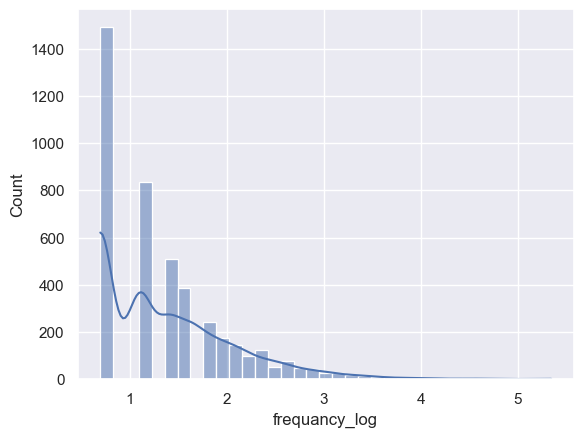

In [35]:
sns.histplot(x=rfm['frequancy_log'], kde=True)

<Axes: xlabel='monetary_log', ylabel='Count'>

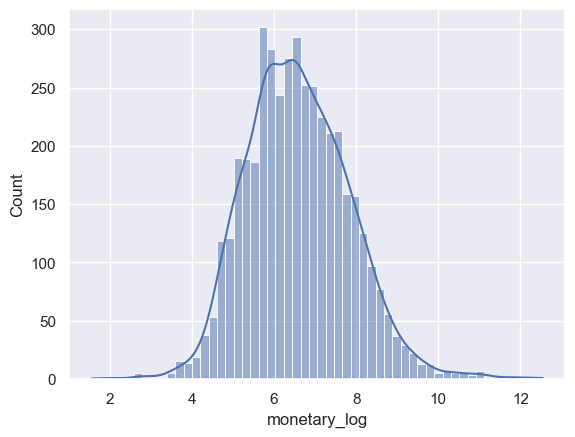

In [36]:
sns.histplot(x=rfm['monetary_log'], kde=True)

<Axes: xlabel='recency_log', ylabel='Count'>

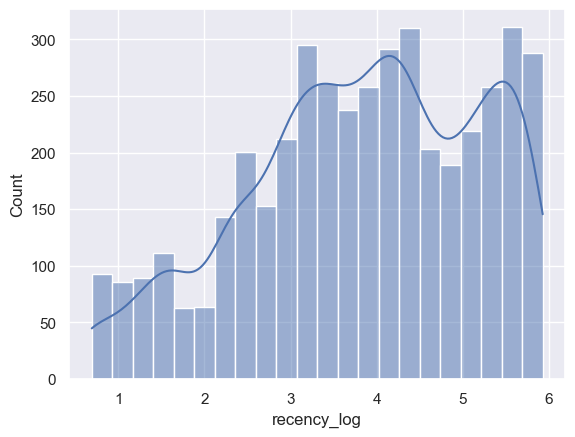

In [37]:
sns.histplot(x=rfm['recency_log'], kde=True)

---------------------------------------------------------------------------------------------

In [38]:
scaler= StandardScaler()
rfm_scaled= scaler.fit_transform(rfm[['frequancy_log','monetary_log','recency_log']])

---------------------------------------------------------------------------------------------

# بناء النموذج 
الخطوات الاولى حذف الاعمدة غير الضرورية ( الوصف ورقم المنتج والبلد)  و حذف القيم السالبة في الكميات ( المرتجعات ) وحذف العملاء بدون اسم ) و قياس توزيع البيات و العلاقات بين المتغيرات 

---------------------------------------------------------------------------------------------

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [52]:
inertia = []
silhouette_scores = []

for k in range(1, 11):
    kmean = KMeans(n_clusters=k, random_state=42)
    kmean.fit(rfm_scaled)
    inertia.append(kmean.inertia_)
    
    if k > 1:
        labels = kmean.labels_
        score = silhouette_score(rfm_scaled, labels)
        silhouette_scores.append(score)
        print(f'K = {k} | Silhouette Score: {score:.3f}')
    else:
        silhouette_scores.append(None)  # للتماشي مع شكل البيانات بالرسم لاحقًا



K = 2 | Silhouette Score: 0.433
K = 3 | Silhouette Score: 0.336
K = 4 | Silhouette Score: 0.335
K = 5 | Silhouette Score: 0.314
K = 6 | Silhouette Score: 0.315
K = 7 | Silhouette Score: 0.296
K = 8 | Silhouette Score: 0.277
K = 9 | Silhouette Score: 0.281
K = 10 | Silhouette Score: 0.277


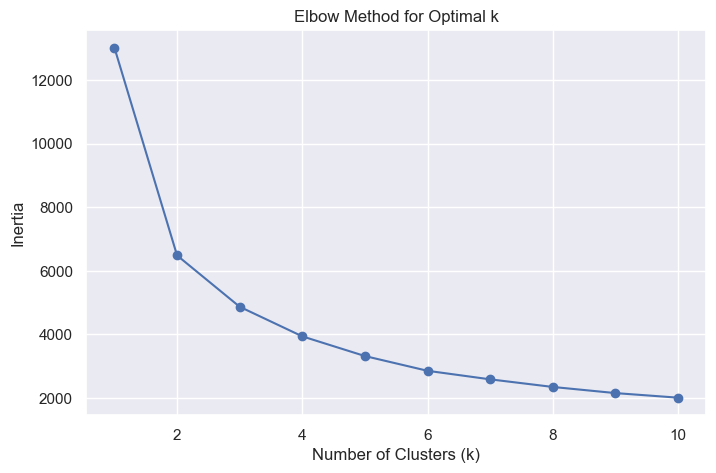

In [41]:
# رسم Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()




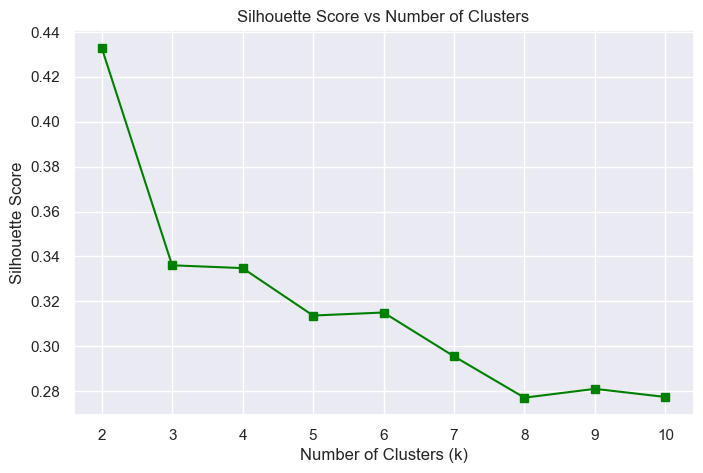

In [42]:
# رسم منحنى Silhouette Score من K=2
plt.figure(figsize=(8, 5))
plt.plot(k_values[1:], silhouette_scores[1:], marker='s', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

---------------------------------------------------------------------------------------------

# KMeans موديل التصنيف 

In [43]:
kmean = KMeans(n_clusters=4,random_state=42)
labels= kmean.fit_predict(rfm_scaled)+1
rfm['cluster']=labels 

In [44]:
rfm.head()

,CustomerID,recency,frequancy,monetary,frequancy_log,monetary_log,recency_log,cluster
0,12346.0,326,1,77183.60,0.693147,11.253955,5.789960,3
1,12347.0,2,7,4310.00,2.079442,8.368925,1.098612,2
2,12348.0,75,4,1797.24,1.609438,7.494564,4.330733,3
3,12349.0,19,1,1757.55,0.693147,7.472245,2.995732,1
4,12350.0,310,1,334.40,0.693147,5.815324,5.739793,4


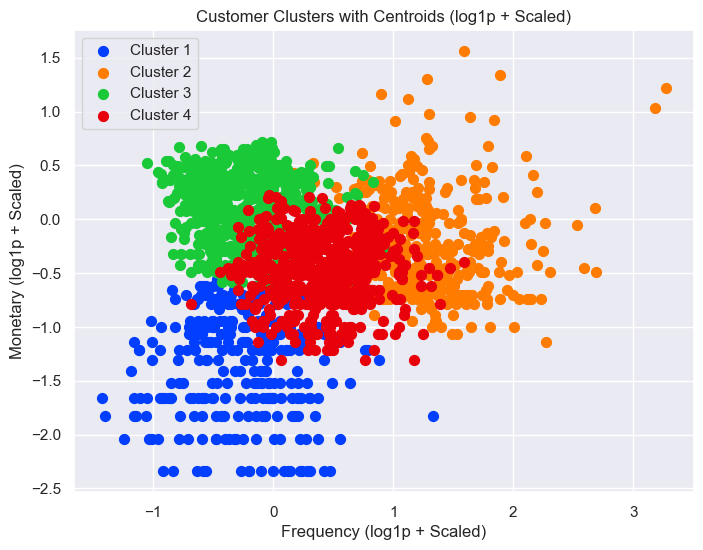

In [55]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette('bright', n_colors=4)

for cluster in range(4):
    plt.scatter(
        rfm_scaled[kmean.labels_ == cluster, 1],  # Frequency بعد اللوغ + سكالينغ
        rfm_scaled[kmean.labels_ == cluster, 2],  # Monetary بعد اللوغ + سكالينغ
        s=50, label=f'Cluster {cluster + 1}', color=palette[cluster]
    )

plt.title('Customer Clusters with Centroids (log1p + Scaled)')
plt.xlabel('Frequency (log1p + Scaled)')
plt.ylabel('Monetary (log1p + Scaled)')
plt.legend()
plt.grid(True)
plt.show()


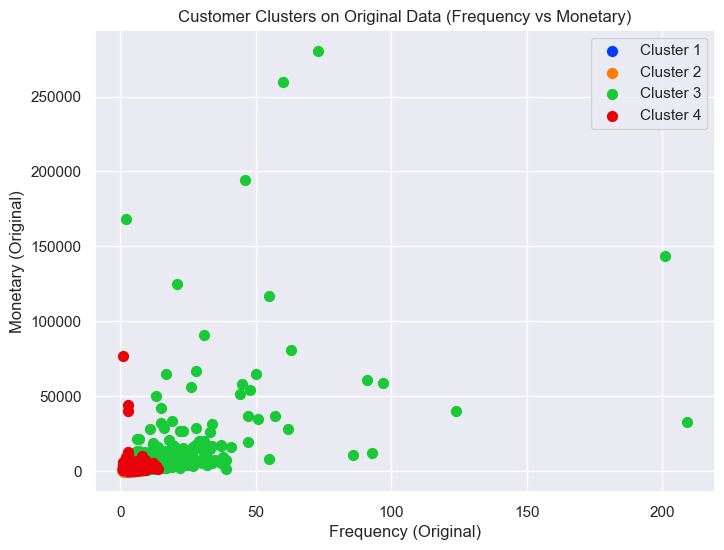

In [54]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette('bright', n_colors=4)

for cluster in range(4):
    plt.scatter(
        rfm[rfm['cluster'] == cluster]['frequancy'],
        rfm[rfm['cluster'] == cluster]['monetary'],
        s=50, label=f'Cluster {cluster + 1}', color=palette[cluster]
    )

plt.title('Customer Clusters on Original Data (Frequency vs Monetary)')
plt.xlabel('Frequency (Original)')
plt.ylabel('Monetary (Original)')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
# مثال مبدأي للتسمية بناءً على ملخص الأرقام
rfm['Cluster_Name'] = rfm['cluster'].map({
    1: 'New Comers',      # عملاء جدد ونشطين
    2: 'Loyal Customers', # ولاء وتكرار قوي
    3: 'At Risk',         # مهددين بالفقدان
    4: 'Lost'             # فقدناهم غالبًا
})


In [48]:
summary = rfm.groupby('Cluster_Name').agg({
    'recency': 'mean',
    'frequancy': 'mean',
    'monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Num_Customers'})



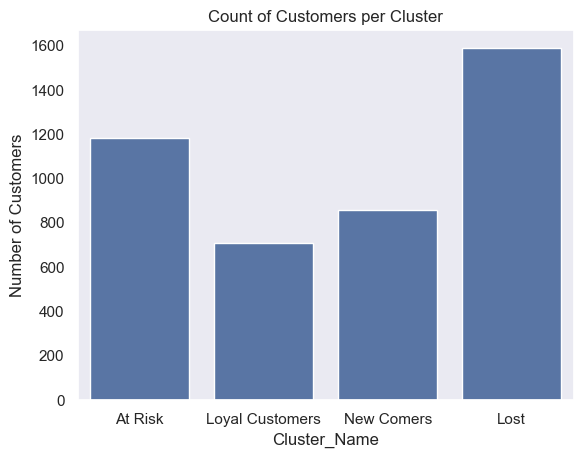

In [49]:
sns.countplot(data=rfm, x='Cluster_Name')

plt.title('Count of Customers per Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [50]:
print(summary)


                    recency  frequancy     monetary  Num_Customers
Cluster_Name                                                      
At Risk           66.718987   4.172996  1819.250247           1185
Lost             186.730818   1.338994   353.811051           1590
Loyal Customers   11.736917  13.775106  8107.548571            707
New Comers        20.047897   2.008178   510.281472            856


In [51]:
rfm.head()

,CustomerID,recency,frequancy,monetary,frequancy_log,monetary_log,recency_log,cluster,Cluster_Name
0,12346.0,326,1,77183.60,0.693147,11.253955,5.789960,3,At Risk
1,12347.0,2,7,4310.00,2.079442,8.368925,1.098612,2,Loyal Customers
2,12348.0,75,4,1797.24,1.609438,7.494564,4.330733,3,At Risk
3,12349.0,19,1,1757.55,0.693147,7.472245,2.995732,1,New Comers
4,12350.0,310,1,334.40,0.693147,5.815324,5.739793,4,Lost


-----------------------------------------------------------------------------------

# deployment 
using a supervised model now for the classification 

In [68]:
# random forest tree where the cluster is the target 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
import pickle

In [69]:
X = rfm[['recency_log', 'frequancy_log', 'monetary_log']]
y = rfm['Cluster_Name']


In [70]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the train data 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [71]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1_macro')

print(f"F1 Macro Scores لكل جزء: {scores}")
print(f"متوسط F1 Macro: {scores.mean():.3f}")


F1 Macro Scores لكل جزء: [0.96353084 0.9683428  0.97268129 0.97608241 0.98081313]
متوسط F1 Macro: 0.972


In [72]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [73]:
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print(f"✅ Final F1 Macro Score: {f1_macro:.3f}")
print(f"✅ Final Accuracy: {acc * 100:.2f}%")
print("\n🔎 Detailed Report:")
print(classification_report(y_test, y_pred, target_names=y.unique()))


✅ Final F1 Macro Score: 0.980
✅ Final Accuracy: 97.81%

🔎 Detailed Report:
                 precision    recall  f1-score   support

        At Risk       0.97      0.95      0.96       237
Loyal Customers       0.98      0.98      0.98       323
     New Comers       0.99      0.99      0.99       145
           Lost       0.96      1.00      0.98       163

       accuracy                           0.98       868
      macro avg       0.98      0.98      0.98       868
   weighted avg       0.98      0.98      0.98       868



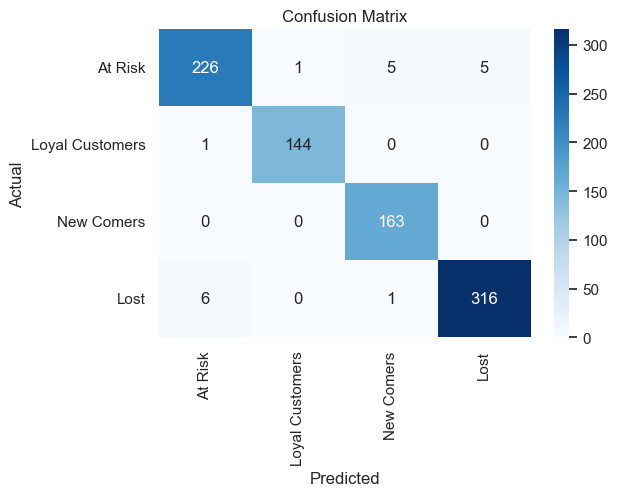

In [74]:
cm = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [75]:
cm

array([[226,   1,   5,   5],
       [  1, 144,   0,   0],
       [  0,   0, 163,   0],
       [  6,   0,   1, 316]], dtype=int64)

In [78]:
features_used = ['recency_log', 'frequancy_log', 'monetary_log']

with open('rfm_classifier.pkl', 'wb') as f:
    pickle.dump({'model': model, 'scaler': scaler, 'features': features_used}, f)


print("✅ تم حفظ النموذج والسكالير featuers معًا بنجاح.")


✅ تم حفظ النموذج والسكالير featuers معًا بنجاح.


-----------------------------------------------------------------------------------

In [79]:
print("الأعمدة المستخدمة للتدريب والحفظ:", features_used)


الأعمدة المستخدمة للتدريب والحفظ: ['recency_log', 'frequancy_log', 'monetary_log']


In [77]:
# توليد بيانات وهمية لـ 20 عميل
np.random.seed(42)
data = {
    'CustomerID': np.arange(1001, 1021),
    'recency': np.random.randint(1, 365, size=20),        # الأيام منذ آخر عملية
    'frequancy': np.random.randint(1, 20, size=20),       # عدد مرات الشراء
    'monetary': np.random.randint(100, 10000, size=20)    # القيمة المالية الإجمالية
}
df_mock = pd.DataFrame(data)
df_mock.to_csv('mock_data__RFM.csv', index=False, encoding='utf-8-sig')
print("✅ تم إنشاء ملف mock_data__RFM.csv بنجاح.")


✅ تم إنشاء ملف mock_data__RFM.csv بنجاح.
